In [1]:
import pandas as pd
df = pd.read_csv('student_info.csv')
df.head()

,student_id,name,gender,age,grade_level,math_score,reading_score,writing_score,attendance_rate,parent_education,study_hours,internet_access,lunch_type,extra_activities,final_result
0,S1,Student_1,Other,17,10,74,61,90,94.660002,Master's,4.120192,Yes,Free or reduced,Yes,Fail
1,S2,Student_2,Male,17,12,99,70,91,93.173227,Bachelor's,2.886505,No,Free or reduced,No,Pass
2,S3,Student_3,Other,17,9,59,60,99,98.631098,PhD,1.909926,No,Free or reduced,No,Fail
3,S4,Student_4,Other,17,12,70,88,69,96.419620,PhD,1.664740,No,Standard,No,Pass
4,S5,Student_5,Male,15,9,85,77,94,91.332105,PhD,2.330918,Yes,Free or reduced,No,Pass


In [2]:
print("Shape:", df.shape)
df.info()
df.describe()

Shape: (1000, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        1000 non-null   object 
 1   name              1000 non-null   object 
 2   gender            1000 non-null   object 
 3   age               1000 non-null   int64  
 4   grade_level       1000 non-null   int64  
 5   math_score        1000 non-null   int64  
 6   reading_score     1000 non-null   int64  
 7   writing_score     1000 non-null   int64  
 8   attendance_rate   1000 non-null   float64
 9   parent_education  1000 non-null   object 
 10  study_hours       1000 non-null   float64
 11  internet_access   1000 non-null   object 
 12  lunch_type        1000 non-null   object 
 13  extra_activities  1000 non-null   object 
 14  final_result      1000 non-null   object 
dtypes: float64(2), int64(5), object(8)
memory usage: 117.3+ KB


,age,grade_level,math_score,reading_score,writing_score,attendance_rate,study_hours
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,15.999000,10.473000,75.165000,74.293000,75.150000,89.879179,2.978380
std,0.817109,1.136029,14.304349,14.312652,14.395094,5.725007,1.167780
min,15.000000,9.000000,50.000000,50.000000,50.000000,80.000614,1.015673
25%,15.000000,9.000000,63.000000,62.000000,63.000000,84.971772,1.955287
50%,16.000000,10.000000,75.000000,74.000000,75.000000,89.980889,2.962665
75%,17.000000,12.000000,88.000000,86.000000,88.000000,94.629778,3.994360
max,17.000000,12.000000,99.000000,99.000000,99.000000,99.954988,4.997843


In [3]:
df.isnull().sum()

student_id          0
name                0
gender              0
age                 0
grade_level         0
math_score          0
reading_score       0
writing_score       0
attendance_rate     0
parent_education    0
study_hours         0
internet_access     0
lunch_type          0
extra_activities    0
final_result        0
dtype: int64

In [5]:
df['gender'].value_counts()


gender
Male      355
Female    326
Other     319
Name: count, dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


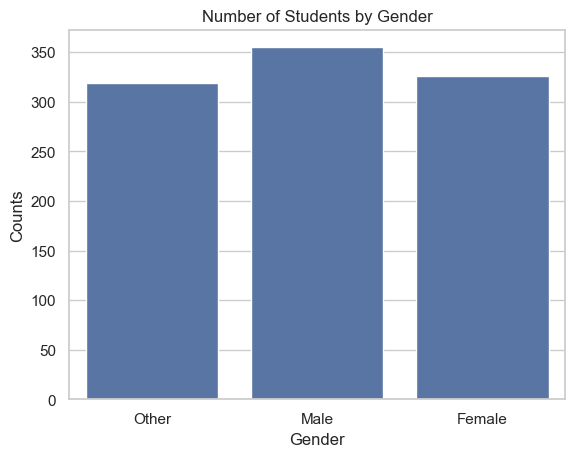

In [9]:
sns.countplot(data=df, x='gender')
plt.title("Number of Students by Gender")
plt.xlabel("Gender")
plt.ylabel("Counts")
plt.show()


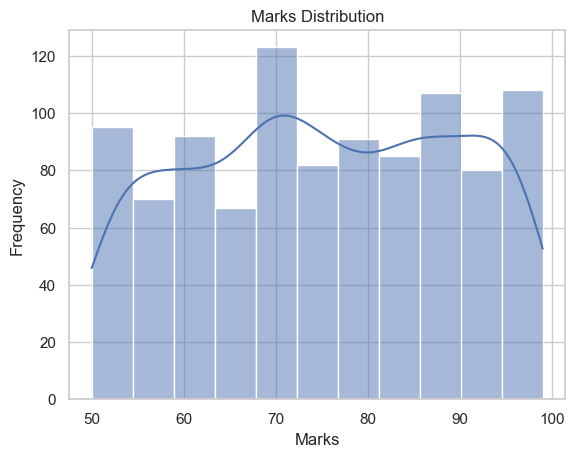

In [11]:
sns.histplot(df['math_score'], kde=True)
plt.title("Marks Distribution")
plt.xlabel("Marks")
plt.ylabel("Frequency")
plt.show()


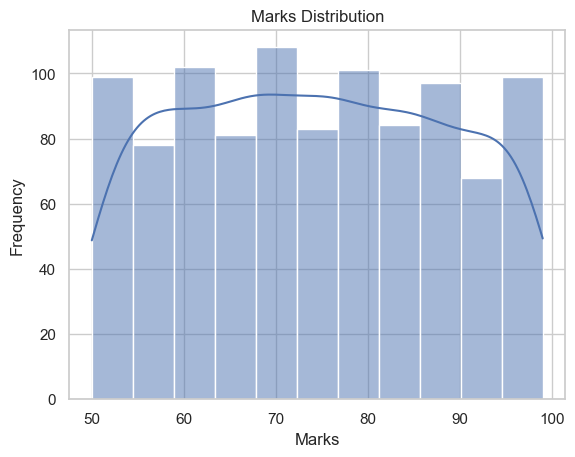

In [12]:
sns.histplot(df['reading_score'], kde=True)
plt.title("Marks Distribution")
plt.xlabel("Marks")
plt.ylabel("Frequency")
plt.show()


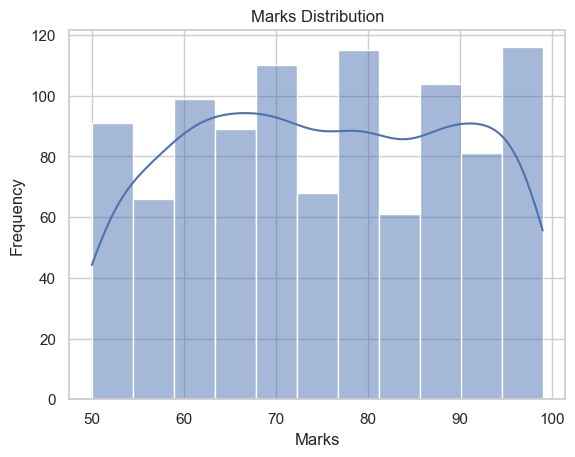

In [14]:
sns.histplot(df['writing_score'], kde=True)
plt.title("Marks Distribution")
plt.xlabel("Marks")
plt.ylabel("Frequency")
plt.show()


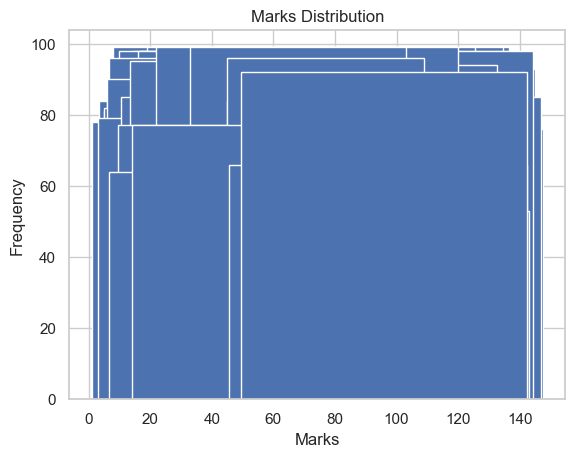

In [17]:
plt.bar(df['math_score'],df['reading_score'],df['writing_score'])
plt.title("Marks Distribution")
plt.xlabel("Marks")
plt.ylabel("Frequency")
plt.show()


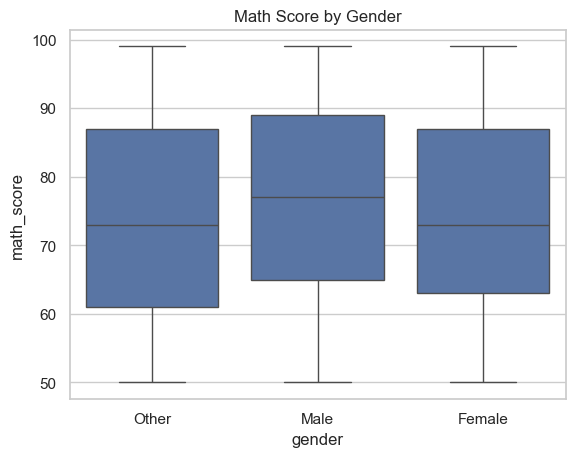

In [18]:
sns.boxplot(x='gender', y='math_score', data=df)
plt.title("Math Score by Gender")
plt.show()

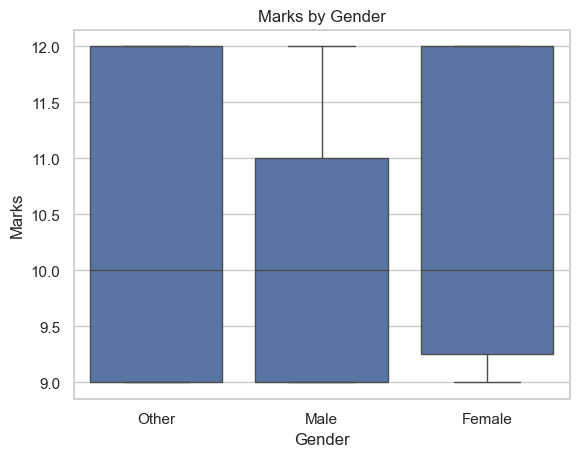

In [21]:
sns.boxplot(data=df, x='gender', y='grade_level')
plt.title("Marks by Gender")
plt.xlabel("Gender")
plt.ylabel("Marks")
plt.show()


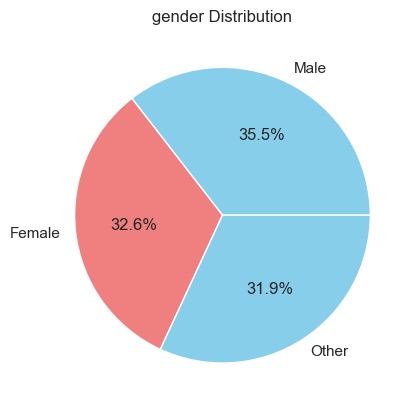

In [24]:
df['gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title("gender Distribution")
plt.ylabel("")
plt.show()


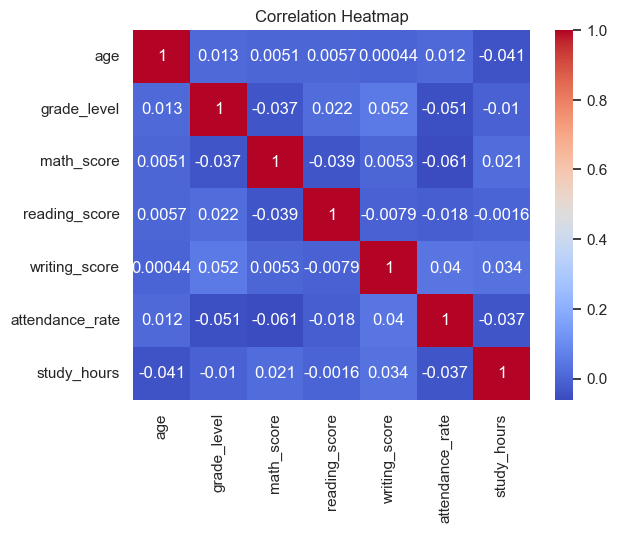

In [26]:
# Only select numeric columns before computing correlation
numeric_df = df.select_dtypes(include='number')

# Now plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

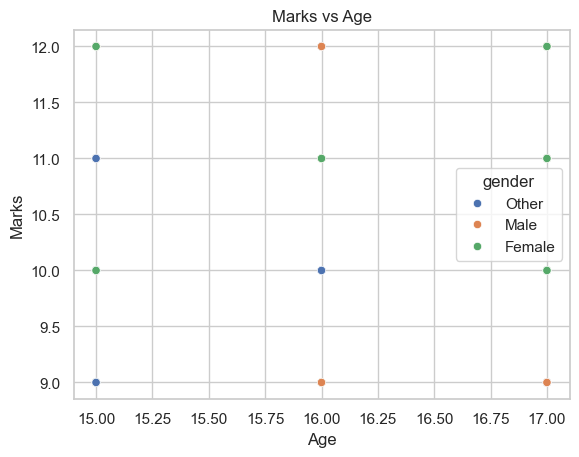

In [28]:
sns.scatterplot(data=df, x='age', y='grade_level', hue='gender')
plt.title("Marks vs Age")
plt.xlabel("Age")
plt.ylabel("Marks")
plt.show()


In [32]:
main=df.groupby('gender')['attendance_rate'].mean()

In [33]:
main

gender
Female    90.125549
Male      89.629485
Other     89.905276
Name: attendance_rate, dtype: float64

<Axes: xlabel='gender'>

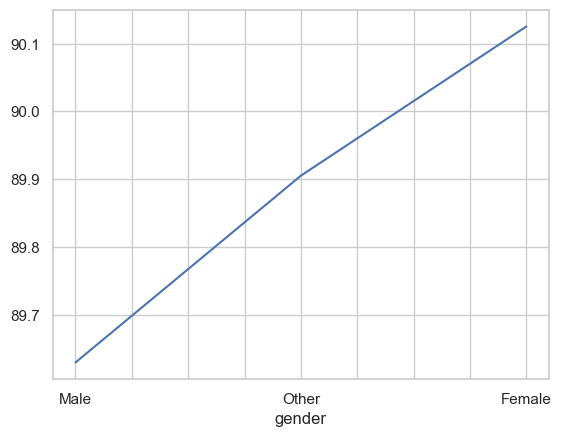

In [34]:
main.sort_values().plot()

In [35]:
main2=df.groupby('final_result')['study_hours'].mean()

<Axes: title={'center': 'school final result'}, xlabel='study_hours', ylabel='final_results'>

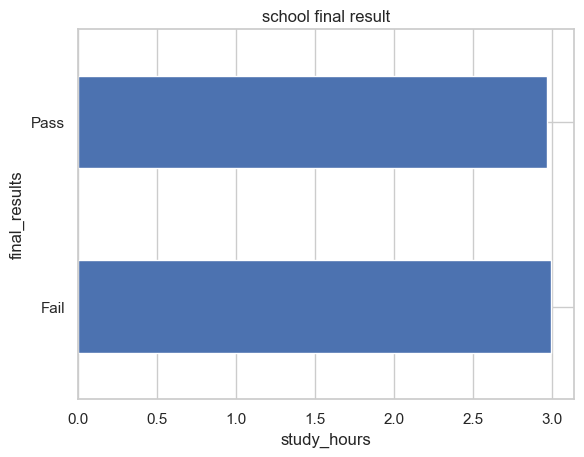

In [41]:
main2.plot(kind='barh', title='school final result',xlabel="study_hours",ylabel="final_results")

<Axes: title={'center': 'school final result'}, xlabel='study_hours', ylabel='final_results'>

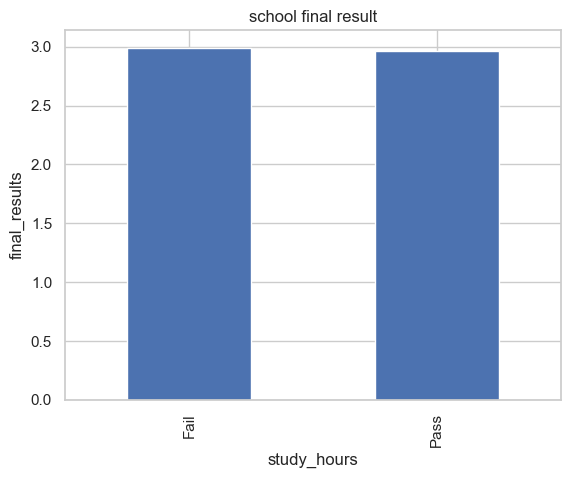

In [42]:
main2.plot(kind='bar', title='school final result',xlabel="study_hours",ylabel="final_results")

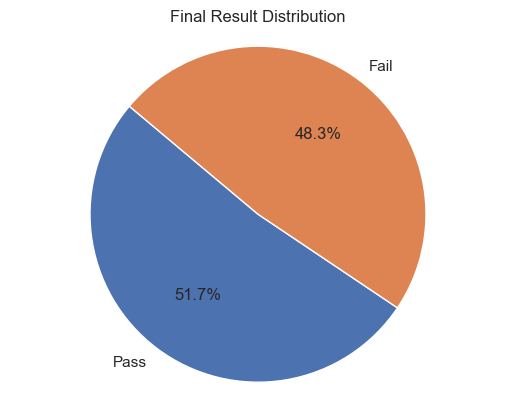

In [45]:
final_counts = df['final_result'].value_counts()
plt.pie(final_counts, labels=final_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Final Result Distribution")
plt.axis('equal')  
plt.show()

In [47]:
import plotly.express as px


In [50]:
fig = px.scatter(df, x="age", y="final_result", color="gender", title="🎯 Marks vs Age (Interactive)")
fig.show()

C:\Users\marot\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.



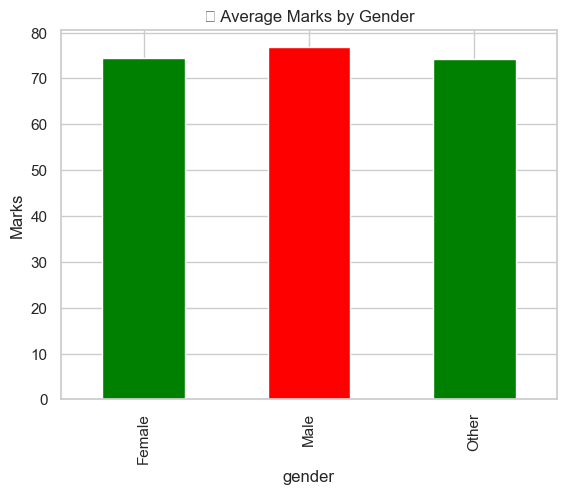

In [51]:
df.groupby('gender')['math_score'].mean().plot(kind='bar', color=['green', 'red'])
plt.title("📊 Average Marks by Gender")
plt.ylabel("Marks")
plt.show()


In [53]:
top_students = df[df['math_score'] > 90]
top_students[['name', 'math_score', 'gender']]


,name,math_score,gender
1,Student_2,99,Male
27,Student_28,99,Other
32,Student_33,93,Female
34,Student_35,95,Other
35,Student_36,98,Female
...,...,...,...
963,Student_964,93,Male
965,Student_966,93,Female
974,Student_975,96,Male
998,Student_999,94,Other
